In [352]:
import numpy as np
import cv2
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

In [353]:
img = cv2.imread('./data/Ajay_Devgan/012_Ajay20Devgan.jpg')
img.shape

(280, 280, 3)

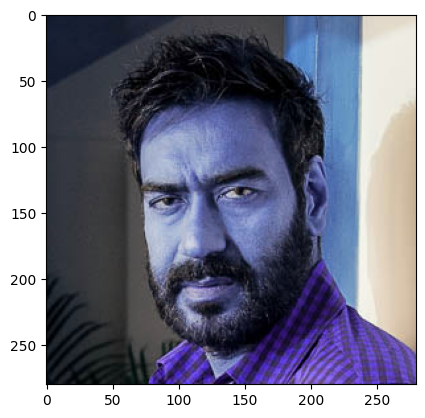

In [354]:
plt.imshow(img)

In [355]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray.shape

(280, 280)

In [356]:
gray

array([[ 31,  31,  31, ..., 214, 214, 214],
       [ 31,  31,  31, ..., 214, 214, 214],
       [ 31,  31,  32, ..., 214, 214, 214],
       ...,
       [ 12,  10,  13, ...,  85,  95, 124],
       [ 15,  10,   9, ...,  77,  84, 103],
       [ 17,  11,   7, ...,  79,  78,  84]], dtype=uint8)

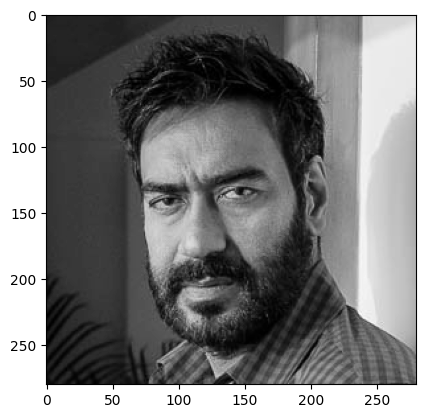

In [357]:
plt.imshow(gray, cmap='gray')

In [358]:
face_cascade = cv2.CascadeClassifier('./haarcascades/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('./haarcascades/haarcascade_eye.xml')

faces = face_cascade.detectMultiScale(gray, 1.3, 5)
faces

array([[ 44,  74, 158, 158]])

In [359]:
(x,y,w,h) = faces[0]
x,y,w,h

(44, 74, 158, 158)

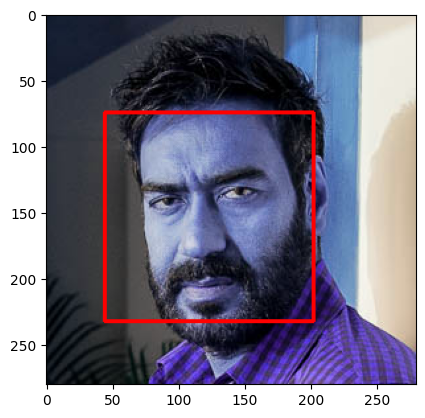

In [360]:
face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
plt.imshow(face_img)

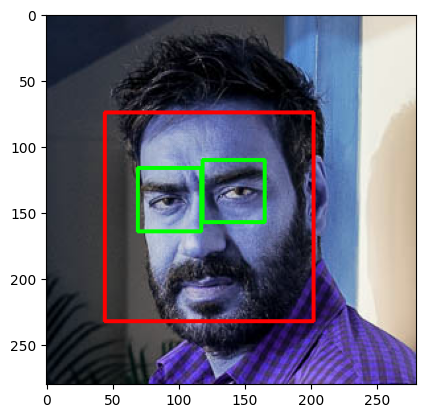

In [361]:
cv2.destroyAllWindows()
for (x,y,w,h) in faces:
    face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = face_img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
        

plt.figure()
plt.imshow(face_img, cmap='gray')
plt.show()

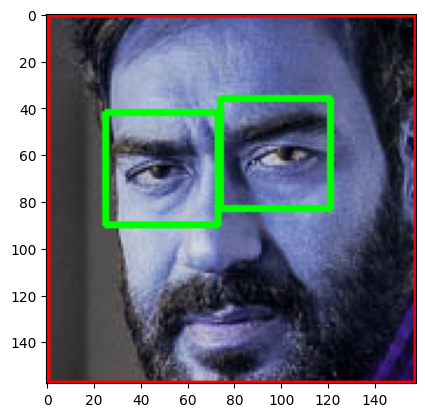

In [362]:
%matplotlib inline
plt.imshow(roi_color, cmap='gray')

In [363]:
cropped_img = np.array(roi_color)
cropped_img.shape

(158, 158, 3)

In [364]:
import numpy as np
import pywt
import cv2    

def w2d(img, mode='haar', level=1):
    imArray = img
    #Datatype conversions
    #convert to grayscale
    imArray = cv2.cvtColor( imArray,cv2.COLOR_RGB2GRAY )
    #convert to float
    imArray =  np.float32(imArray)   
    imArray /= 255;
    # compute coefficients 
    coeffs=pywt.wavedec2(imArray, mode, level=level)

    #Process Coefficients
    coeffs_H=list(coeffs)  
    coeffs_H[0] *= 0;  

    # reconstruction
    imArray_H=pywt.waverec2(coeffs_H, mode);
    imArray_H *= 255;
    imArray_H =  np.uint8(imArray_H)

    return imArray_H

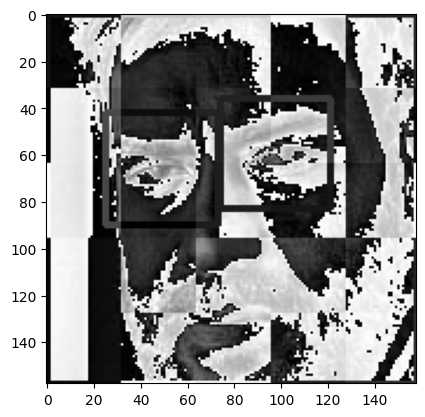

In [365]:
im_har = w2d(cropped_img,'db1',5)
plt.imshow(im_har, cmap='gray')

In [366]:
def get_cropped_image_if_2_eyes(image_path):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x,y,w,h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes) >= 2:
            return roi_color

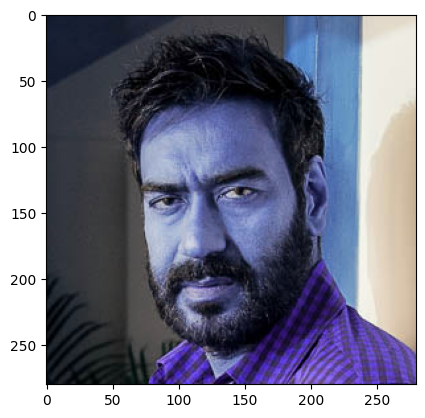

In [367]:
original_image = cv2.imread('./data/Ajay_Devgan/012_Ajay20Devgan.jpg')
plt.imshow(original_image)

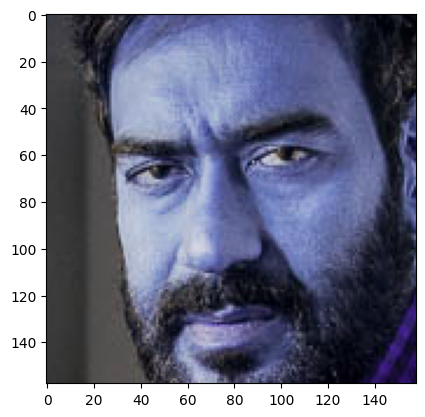

In [368]:
cropped_image = get_cropped_image_if_2_eyes('./data/Ajay_Devgan/012_Ajay20Devgan.jpg')
plt.imshow(cropped_image)

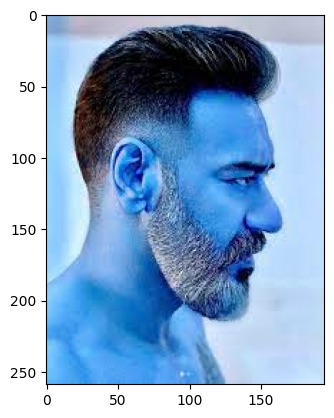

In [369]:
org_image_obstructed = cv2.imread('./data/Ajay_Devgan/Side.jpeg')
plt.imshow(org_image_obstructed)

In [370]:
cropped_image_no_2_eyes = get_cropped_image_if_2_eyes('./data/Ajay_Devgan/Side.jpeg')
cropped_image_no_2_eyes

In [371]:
path_to_data = "./data/"
path_to_cr_data = "./cropped/"

In [372]:
import os
img_dirs = []
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)

In [373]:
img_dirs

['./data/Ajay_Devgan',
 './data/Hrithik_Roshan',
 './data/Leonardo_DiCaprio',
 './data/Mahesh_Babu',
 './data/Shah_Rukh_Khan']

In [374]:
import shutil
if os.path.exists(path_to_cr_data):
     shutil.rmtree(path_to_cr_data)
os.mkdir(path_to_cr_data)

In [375]:
cropped_image_dirs = []
celebrity_file_names_dict = {}
for img_dir in img_dirs:
    count = 1
    celebrity_name = img_dir.split('/')[-1]
    celebrity_file_names_dict[celebrity_name] = []
    for entry in os.scandir(img_dir):
        roi_color = get_cropped_image_if_2_eyes(entry.path)
        if roi_color is not None:
            cropped_folder = path_to_cr_data + celebrity_name
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_image_dirs.append(cropped_folder)
                print("Generating cropped images in folder: ",cropped_folder)
            cropped_file_name = celebrity_name + str(count) + ".png"
            cropped_file_path = cropped_folder + "/" + cropped_file_name
            cv2.imwrite(cropped_file_path, roi_color)
            celebrity_file_names_dict[celebrity_name].append(cropped_file_path)
            count += 1

Generating cropped images in folder:  ./cropped/Ajay_Devgan
Generating cropped images in folder:  ./cropped/Hrithik_Roshan
Generating cropped images in folder:  ./cropped/Leonardo_DiCaprio
Generating cropped images in folder:  ./cropped/Mahesh_Babu
Generating cropped images in folder:  ./cropped/Shah_Rukh_Khan


In [376]:
celebrity_file_names_dict = {}
for img_dir in cropped_image_dirs:
    celebrity_name = img_dir.split('/')[-1]
    file_list = []
    for entry in os.scandir(img_dir):
        file_list.append(entry.path)
    celebrity_file_names_dict[celebrity_name] = file_list
celebrity_file_names_dict

{'Ajay_Devgan': ['./cropped/Ajay_Devgan\\Ajay_Devgan1.png',
  './cropped/Ajay_Devgan\\Ajay_Devgan10.png',
  './cropped/Ajay_Devgan\\Ajay_Devgan11.png',
  './cropped/Ajay_Devgan\\Ajay_Devgan12.png',
  './cropped/Ajay_Devgan\\Ajay_Devgan13.png',
  './cropped/Ajay_Devgan\\Ajay_Devgan14.png',
  './cropped/Ajay_Devgan\\Ajay_Devgan15.png',
  './cropped/Ajay_Devgan\\Ajay_Devgan16.png',
  './cropped/Ajay_Devgan\\Ajay_Devgan17.png',
  './cropped/Ajay_Devgan\\Ajay_Devgan18.png',
  './cropped/Ajay_Devgan\\Ajay_Devgan19.png',
  './cropped/Ajay_Devgan\\Ajay_Devgan2.png',
  './cropped/Ajay_Devgan\\Ajay_Devgan20.png',
  './cropped/Ajay_Devgan\\Ajay_Devgan21.png',
  './cropped/Ajay_Devgan\\Ajay_Devgan22.png',
  './cropped/Ajay_Devgan\\Ajay_Devgan23.png',
  './cropped/Ajay_Devgan\\Ajay_Devgan24.png',
  './cropped/Ajay_Devgan\\Ajay_Devgan25.png',
  './cropped/Ajay_Devgan\\Ajay_Devgan26.png',
  './cropped/Ajay_Devgan\\Ajay_Devgan27.png',
  './cropped/Ajay_Devgan\\Ajay_Devgan28.png',
  './cropped/Ajay_Dev

In [377]:
class_dict = {}
count = 0
for celebrity_name in celebrity_file_names_dict.keys():
    class_dict[celebrity_name] = count
    count = count + 1
class_dict

{'Ajay_Devgan': 0,
 'Hrithik_Roshan': 1,
 'Leonardo_DiCaprio': 2,
 'Mahesh_Babu': 3,
 'Shah_Rukh_Khan': 4}

In [378]:
X, y = [], []
for celebrity_name, training_files in celebrity_file_names_dict.items():
    for training_image in training_files:
        img = cv2.imread(training_image)
        scalled_raw_img = cv2.resize(img, (32, 32))
        img_har = w2d(img,'db1',5)
        scalled_img_har = cv2.resize(img_har, (32, 32))
        combined_img = np.vstack((scalled_raw_img.reshape(32*32*3,1),scalled_img_har.reshape(32*32,1)))
        X.append(combined_img)
        y.append(class_dict[celebrity_name]) 

In [379]:
len(X[0])

4096

In [380]:
X[0]

array([[  3],
       [  4],
       [  7],
       ...,
       [ 79],
       [ 20],
       [193]], dtype=uint8)

In [381]:
y[0]

0

In [382]:
X = np.array(X).reshape(len(X),4096).astype(float)
X.shape

(377, 4096)

In [383]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [384]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC(kernel = 'rbf', C = 10))])
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)

0.6736842105263158

In [385]:
print(classification_report(y_test, pipe.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      0.27      0.43        11
           1       0.74      0.64      0.68        22
           2       0.82      0.82      0.82        17
           3       0.69      0.74      0.71        27
           4       0.48      0.72      0.58        18

    accuracy                           0.67        95
   macro avg       0.75      0.64      0.65        95
weighted avg       0.72      0.67      0.67        95



In [386]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.pipeline import make_pipeline

In [387]:
model_params = {
    'logistic_regression': {
        'model': LogisticRegression(solver='liblinear', multi_class='auto'),
        'params': {
            'logisticregression__C': [0.1, 1, 10]
        }
    },
}

In [388]:
scores = []
best_estimators = {}
import pandas as pd
for algo, mp in model_params.items():
    pipe = make_pipeline(StandardScaler(), mp['model'])
    clf =  GridSearchCV(pipe, mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train, y_train)
    scores.append({
        'model': algo,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

d:\ImageRec\venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
d:\ImageRec\venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
d:\ImageRec\venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
d:\ImageRec\venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
d:\ImageRec\venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarn

,model,best_score,best_params
0,logistic_regression,0.649311,{'logisticregression__C': 1}
1,mlp,0.631642,"{'mlpclassifier__activation': 'logistic', 'mlp..."


In [389]:
best_estimators

{'logistic_regression': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('logisticregression',
                  LogisticRegression(C=1, solver='liblinear'))]),
 'mlp': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('mlpclassifier', MLPClassifier(activation='logistic'))])}

In [390]:
best_estimators['logistic_regression'].score(X_test,y_test)

0.7052631578947368

In [392]:
best_clf = best_estimators['logistic_regression']

In [393]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, best_clf.predict(X_test))
cm

array([[ 6,  1,  3,  0,  1],
       [ 0, 17,  2,  1,  2],
       [ 1,  2, 12,  0,  2],
       [ 1,  3,  1, 22,  0],
       [ 2,  2,  2,  2, 10]], dtype=int64)

Text(95.72222222222221, 0.5, 'Truth')

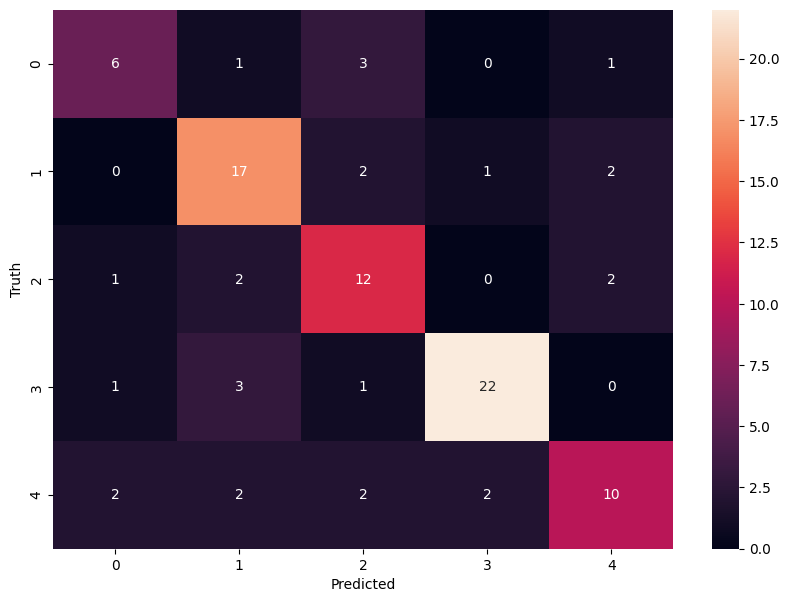

In [394]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [395]:
class_dict

{'Ajay_Devgan': 0,
 'Hrithik_Roshan': 1,
 'Leonardo_DiCaprio': 2,
 'Mahesh_Babu': 3,
 'Shah_Rukh_Khan': 4}

In [396]:
!pip install joblib
import joblib 
# Save the model as a pickle in a file 
joblib.dump(best_clf, 'saved_model.pkl') 


[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


['saved_model.pkl']

In [397]:
import json
with open("class_dictionary.json","w") as f:
    f.write(json.dumps(class_dict))

In [404]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import joblib 
from PIL import Image
import numpy as np


# Load the saved model
loaded_model = joblib.load('saved_model.pkl')

# Function to preprocess input image (if necessary)
# Function to preprocess input image
def preprocess_input_image(image_path):
    # Load the image
    img = Image.open(image_path)
    # Resize the image to match the expected input size (if necessary)
    img = img.resize((64, 64))  # Adjust the size as needed
    # Convert the image to grayscale (if necessary)
    img = img.convert('L')  # Convert to grayscale
    # Flatten the image
    img_array = np.array(img).flatten()
    return img_array

# Path to the input image
input_image_path = 'download1.jpeg'

# Preprocess the input image (if necessary)
# Preprocess the input image
input_image = preprocess_input_image(input_image_path)

# Make predictions
predictions = loaded_model.predict([input_image])

# Print predictions (or use them as needed)
print(predictions)



[2]
